Description du problème :
Le problème consiste à classer un ensemble de données en utilisant les algorithmes de K-means et SVM (Support Vector Machine). Les données sont générées aléatoirement et sont divisées en deux groupes distincts. L'objectif est de trouver le nombre optimal de clusters à l'aide de la méthode du coude, puis d'effectuer la segmentation des données en utilisant K-means. Ensuite, un modèle SVM est entraîné sur les données segmentées pour prédire les classes des points et évaluer la performance à l'aide de la matrice de confusion.

1-Générer les données pour former deux groupes distincts

Le groupe 1 est généré en utilisant des valeurs aléatoires entre 0 et 0.5.

Le groupe 2 est généré en utilisant des valeurs aléatoires entre 2 et 2.5.

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import confusion_matrix

np.random.seed(42)  # Pour obtenir des valeurs aléatoires fixes

# Générer les données du groupe 1
groupe1 = np.random.rand(25, 2) * 0.5

# Générer les données du groupe 2
groupe2 = np.random.rand(25, 2) * 0.5 + 2






2-Concaténer les deux groupes pour former l'ensemble de données final et afficher le nuage de points



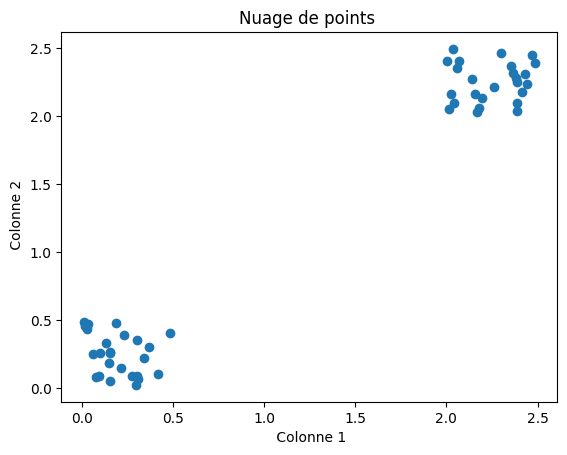

In [131]:
# Concaténer les deux groupes pour former l'ensemble de données final
X = np.concatenate((groupe1, groupe2), axis=0)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(' Colonne 1')
plt.ylabel(' Colonne 2')
plt.title('Nuage de points ')
plt.show()


3-Rechercher le nombre optimal de clusters en utilisant la méthode du coude 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

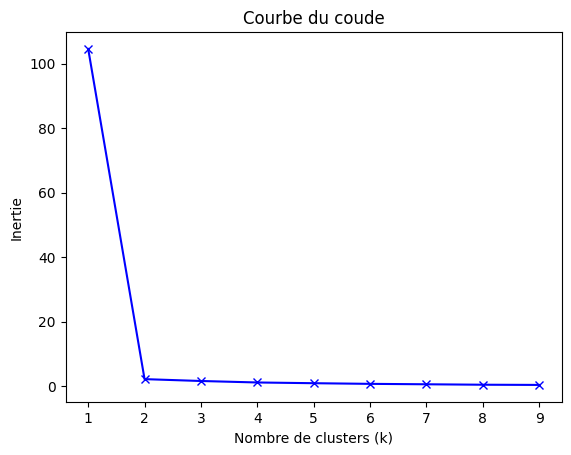

In [132]:
# Partie 2: Recherche du nombre optimal de clusters en utilisant la méthode du coude
inertie = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertie.append(kmeans.inertia_)

plt.plot(k_values, inertie, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Courbe du coude')
plt.show()

4-Classifier les données avec le nombre optimal de clusters et afficher les résultats

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


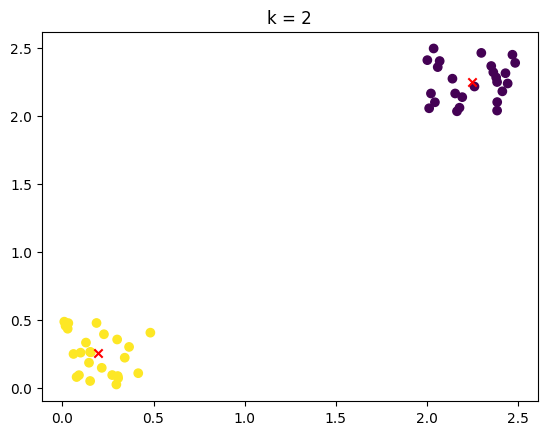

In [133]:

k_optimal = 2  # Remplacer par le nombre optimal de clusters trouvé à partir de la courbe du coude
kmeans = KMeans(n_clusters=k_optimal)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.title(f'k = {k_optimal}')
plt.show()

5-Entraîner un modèle SVM avec les données de clustering et afficher les prédictions

In [134]:

model = svm.SVC(kernel='linear')
model.fit(X, labels)
svm_predictions = model.predict(X)
svm_predictions


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

6-Afficher les lignes de marge du modèle SVM

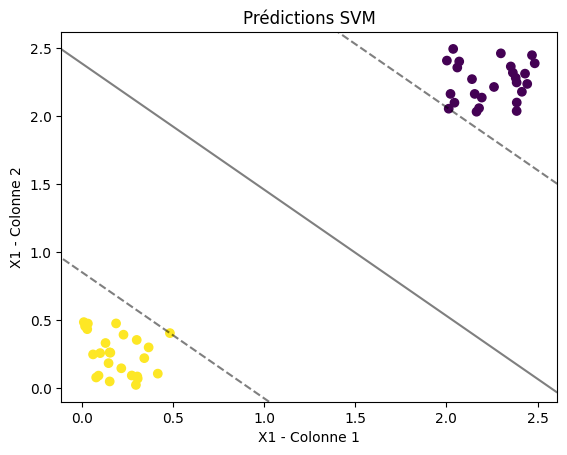

In [135]:
plt.scatter(X[:, 0], X[:, 1], c=svm_predictions, cmap='viridis')
plt.xlabel('X1 - Colonne 1')
plt.ylabel('X1 - Colonne 2')
plt.title('Prédictions SVM')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
XX, YY = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

7-Créer une figure à deux colonnes pour comparer le graphe du modèle SVM et celui du clustering K-means

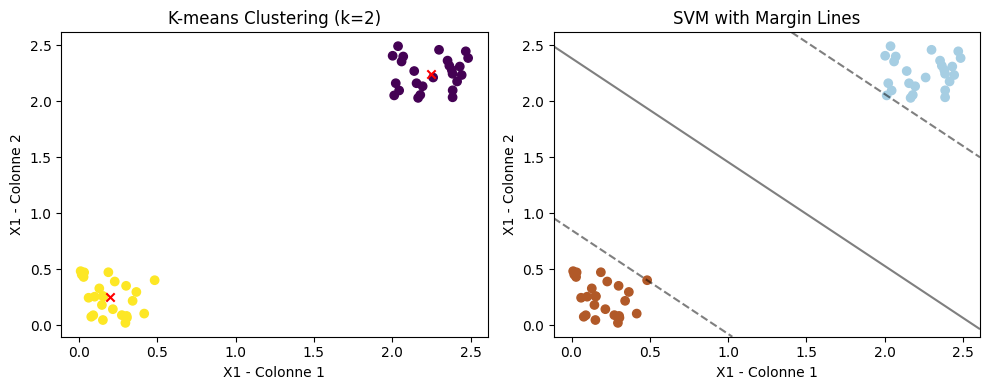

In [136]:
# Création de la figure à deux colonnes
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Premier graphe : Nuage de points et clusters après K-means
axs[0].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
axs[0].scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
axs[0].set_xlabel('X1 - Colonne 1')
axs[0].set_ylabel('X1 - Colonne 2')
axs[0].set_title('K-means Clustering (k=2)')

# Deuxième graphe : Nuage de points avec lignes de marge du modèle SVM
x = X[:, 0]
y = X[:, 1]
axs[1].scatter(x, y, c=labels, cmap=plt.cm.Paired)
axs[1].set_xlabel('X1 - Colonne 1')
axs[1].set_ylabel('X1 - Colonne 2')
axs[1].set_title('SVM with Margin Lines')

# Calcul des lignes de marge
ax = axs[1]
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Ajustement des espacements entre les graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

8-Calculer la matrice de confusion pour évaluer les prédictions du modèle

In [137]:

confusion = confusion_matrix(labels, svm_predictions)
print('Matrice de confusion :')
print(confusion)


Matrice de confusion :
[[25  0]
 [ 0 25]]
